# Katzen gegen Hunde

Lade Bibliotheken zum Darstellen von Katzen/Hundebilder

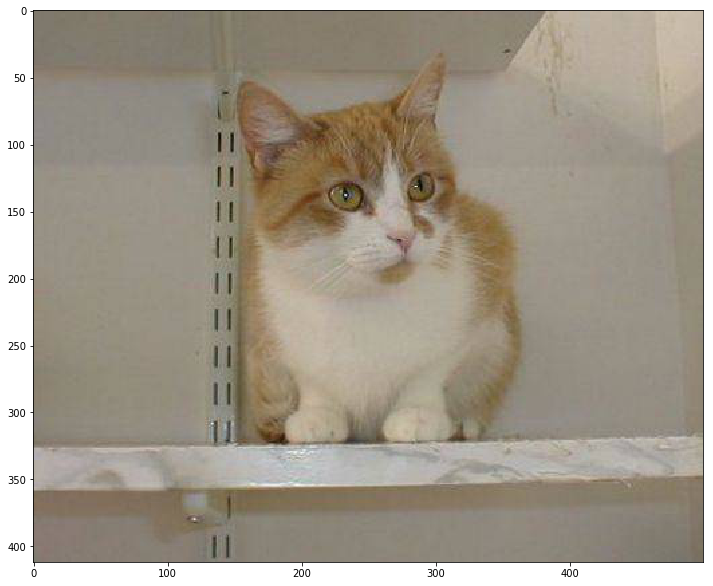

In [1]:
import sys
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.contrib.keras.python.keras.preprocessing.image import img_to_array, load_img
%matplotlib inline

sys.path.insert(0, '../scripts')
import nn_helper
from nn_helper import get_batches, finetune, show_image, show_array


SEED = 42
ROOT = '../../refereeReports/talks/deepLearning/data/processed/cats_vs_dogs'


show_image('{}/train/cat/1943.jpg'.format(ROOT))

## Vorhersagen mit VGG16

Lade Daten 

In [2]:
BATCH_SIZE = 16
batches = get_batches('{}/train'.format(ROOT), batch_size = BATCH_SIZE)

Found 24000 images belonging to 2 classes.


Lade Classifier

In [3]:
from tensorflow.contrib.keras.python.keras.applications.vgg16 import preprocess_input, decode_predictions,  VGG16
import numpy as np

vgg = VGG16(weights='imagenet')

Überprüfe Vorhersagen.

[[('n04507155', 'umbrella', 0.10293408),
  ('n03891251', 'park_bench', 0.056922585),
  ('n03388043', 'fountain', 0.052475404)]]

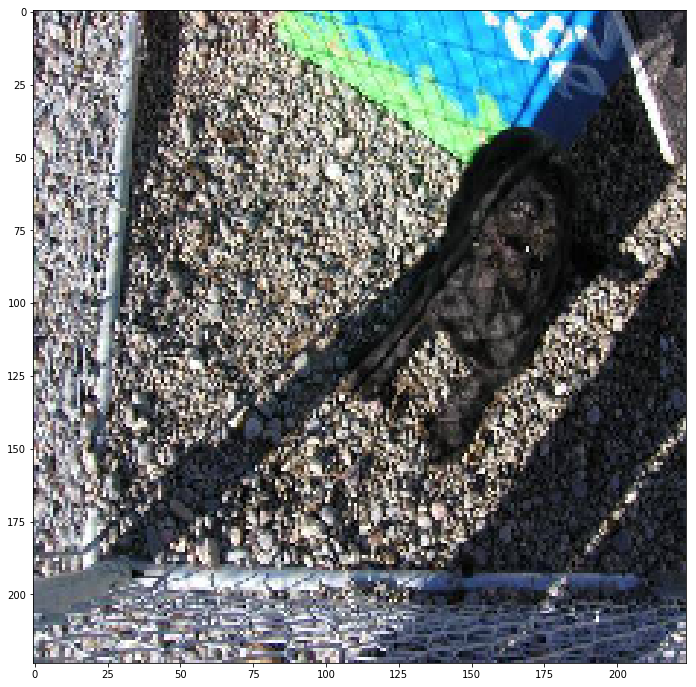

In [8]:
def check_prediction(clf, img):
    show_array(img)
    return clf.predict(preprocess_input(img[:1,:,:,:]))

preds = check_prediction(vgg, next(batches)[0])
decode_predictions(preds, top = 3)

## Training eines angepassten neuronalen Netzwerks

Nun trainieren wir ein neuronales Netz, dass nur Katzen und Hunde unterscheidet.

In [9]:
%%time
batches = [get_batches('{}/{}'.format(ROOT, tv), batch_size = BATCH_SIZE, shuffle = True, seed = SEED) 
           for tv in ['train', 'valid']]

vgg_ft = finetune(vgg, n_class = 2)
#vgg_ft.fit_generator(batches[0], validation_data = batches[1], 
#                    steps_per_epoch = int(batches[0].samples/batches[0].batch_size), 
#                    validation_steps = int(batches[1].samples/batches[1].batch_size))

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
CPU times: user 640 ms, sys: 80 ms, total: 720 ms
Wall time: 699 ms


Alternativ laden wir die Gewichte aus einem früheren run (Laufzeit auf AWS 12000s, validation accuracy: 98%).

In [10]:
vgg_ft.load_weights('../../refereeReports/talks/deepLearning/models/catsdogs_finetune.h5')

Überprüfen wir nun wieder die Vorhersagen.

array([[  1.00000000e+00,   4.45468054e-08]], dtype=float32)

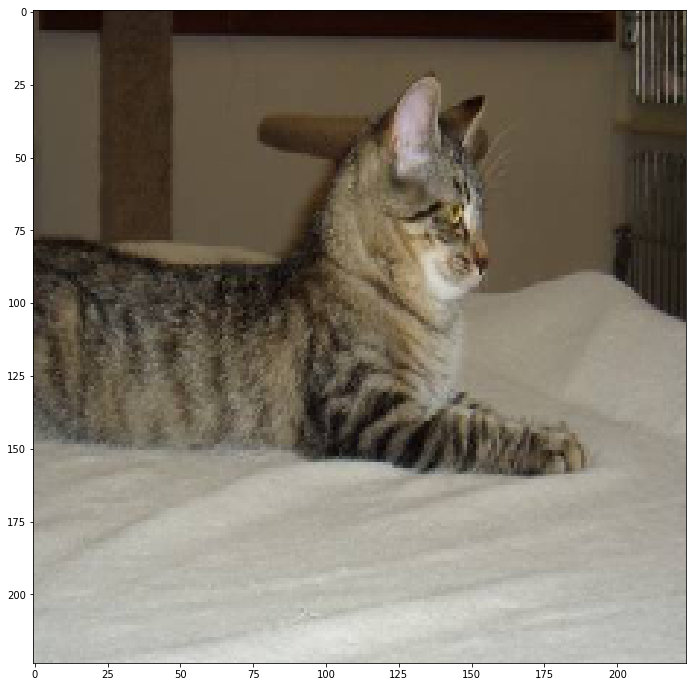

In [12]:
check_prediction(vgg_ft, next(batches[0])[0])